autoencoder

importing all the necessary modules 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D,Conv2DTranspose,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Model
from sklearn.manifold import TSNE
# from tensorflow.keras.utils import to_categorical
import cv2
from keras.preprocessing import image
import random


defined a function thar reads ,resizes and returns image ,given a path for the image

In [2]:
def reaimg(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (200,200))
    
    return img

created a function to load images and their types in a dataframe 

In [3]:
def load(dir,lab):
    dic={"img":[],"lable":[]}
    for file in os.listdir(dir):
        if file.endswith(".png") or file.endswith(".jpg"):
            
            path=os.path.join(dir, file)

            img=reaimg(path)
            imgnp=np.array(img)
            # imgnp=np.reshape(imgnp,(40000,3))

            dic["img"].append(imgnp)
            dic["lable"].append(lab)
    df=pd.DataFrame(dic)     

    return df


Bishop=load(r"C:\Users\Anirudh\Downloads\archive\Chess\Bishop",1)
King=load(r"C:\Users\Anirudh\Downloads\archive\Chess\King",2)
Knight=load(r"C:\Users\Anirudh\Downloads\archive\Chess\Knight",3)
Pawn=load(r"C:\Users\Anirudh\Downloads\archive\Chess\Pawn",4)
Queen=load(r"C:\Users\Anirudh\Downloads\archive\Chess\Queen",5)
Rook=load(r"C:\Users\Anirudh\Downloads\archive\Chess\Rook",6)
# 1 responds to bishop and so on



creating an overall dataframe and preprocessing the images

In [4]:
data = pd.concat([Bishop,King,Knight,Queen,Pawn,Rook], axis=0,ignore_index=True)
data.img=data.img/255


randomising the images and creating training validation and test set

In [5]:
randdata=data.sample(frac=1,random_state=23)
randdata=randdata.reset_index(drop=True)

datatrain=np.array(randdata.img[:420].tolist())
dataval=np.array(randdata.img[420:-10].tolist())
datatest=np.array(randdata.img[-10:].tolist())
yval=np.array(randdata.lable[420:-10].tolist())
ytest=np.array(randdata.lable[-10:].tolist())
# ytrainoh=to_categorical(randdata.lable[:420])

# data=np.array(data)


# data.shape

# datatrain=data[:420]
# dataval=data[420:]
# randdata.shape
# print(ytrainoh[0])



created functions to display the original reconstructed and encoded images

In [6]:
def showimg(a,n=10,title=''):
    plt.figure(figsize=(20,5))
    for i in range(n):
        s=plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(a[i]))
        s.get_yaxis().set_visible(False)
        s.get_yaxis().set_visible(False)
    plt.suptitle(title,fontsize=20)

def showencimg(a,n=10,title='',h=25,w=25):
    plt.figure(figsize=(20,5))
    for i in range(n):
        s=plt.subplot(2,n,i+1)
        plt.imshow(a[i].reshape(h,w))
        s.get_yaxis().set_visible(False)
        s.get_yaxis().set_visible(False)
    plt.suptitle(title,fontsize=20)
    

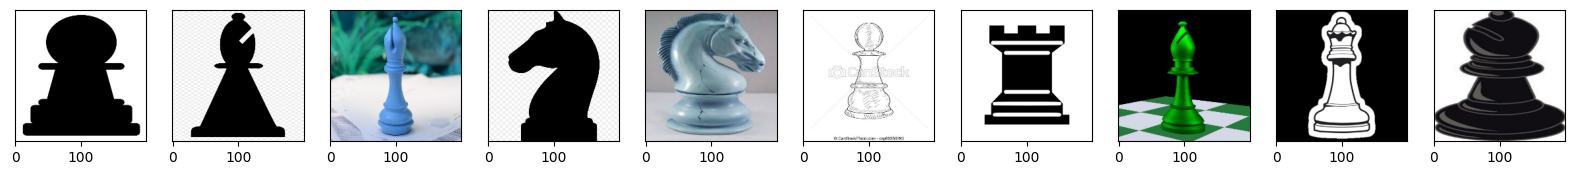

In [7]:
showimg(datatrain)

created the structure of the model using Convolution layers

In [8]:
inputlayer=Input(shape=(200,200,3))
layer=Conv2D(40,(3,3),activation='relu',padding='same')(inputlayer)
layer=MaxPooling2D((2,2))(layer)
layer=Conv2D(16,(3,3),activation='relu',padding='same')(layer)
layer=MaxPooling2D((2,2))(layer)
layer=Conv2D(8,(3,3),activation='relu',padding='same')(layer)
codelayer=MaxPooling2D((2,2),name='code')(layer)
layer=Conv2DTranspose(8,(3,3),activation='relu',padding='same')(codelayer)
layer=UpSampling2D((2,2))(layer)
layer=Conv2DTranspose(16,(3,3),activation='relu',padding='same')(layer)
layer=UpSampling2D((2,2))(layer)
layer=Conv2DTranspose(40,(3,3),activation='relu',padding='same')(layer)
layer=UpSampling2D((2,2))(layer)
outputlayer=Conv2D(3,(3,3),activation='relu',padding='same')(layer)

declaring the autoencoder

In [9]:
chessae=Model(inputlayer,outputlayer)
chessae.compile(optimizer="adam",loss='mse')
chessae.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 40)      1120      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 40)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      5776      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 8)         1160 

training the autoencoder

In [10]:
chessae.fit(datatrain,datatrain,epochs=30,batch_size=12,shuffle=True,
            validation_data=(dataval,dataval))

Epoch 1/30

35/35 [==============================] - 11s 258ms/step - loss: 0.1964 - val_loss: 0.0399
Epoch 2/30
35/35 [==============================] - 8s 235ms/step - loss: 0.0247 - val_loss: 0.0215
Epoch 3/30
35/35 [==============================] - 8s 240ms/step - loss: 0.0168 - val_loss: 0.0181
Epoch 4/30
35/35 [==============================] - 8s 235ms/step - loss: 0.0147 - val_loss: 0.0166
Epoch 5/30
35/35 [==============================] - 8s 234ms/step - loss: 0.0135 - val_loss: 0.0156
Epoch 6/30
35/35 [==============================] - 8s 239ms/step - loss: 0.0128 - val_loss: 0.0149
Epoch 7/30
35/35 [==============================] - 8s 238ms/step - loss: 0.0115 - val_loss: 0.0134
Epoch 8/30
35/35 [==============================] - 8s 241ms/step - loss: 0.0107 - val_loss: 0.0128
Epoch 9/30
35/35 [==============================] - 8s 235ms/step - loss: 0.0101 - val_loss: 0.0127
Epoch 10/30
35/35 [==============================] - 8s 237ms/step - loss: 0.0104 - val_loss: 0.01

In [11]:
chessae.save('model4final.h5')

c:\Users\Anirudh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


getting the encoder 

In [12]:
encodedchess=Model(inputs=chessae.input, outputs=chessae.get_layer('code').output)
encchs=encodedchess.predict(datatest)
# encchs.shape
encchs=encchs.reshape(len(datatest),25*25*8)
# encchs.shape

1/1 [==============================] - 0s 156ms/step


In [13]:
reconchs=chessae.predict(datatest)

1/1 [==============================] - 0s 242ms/step


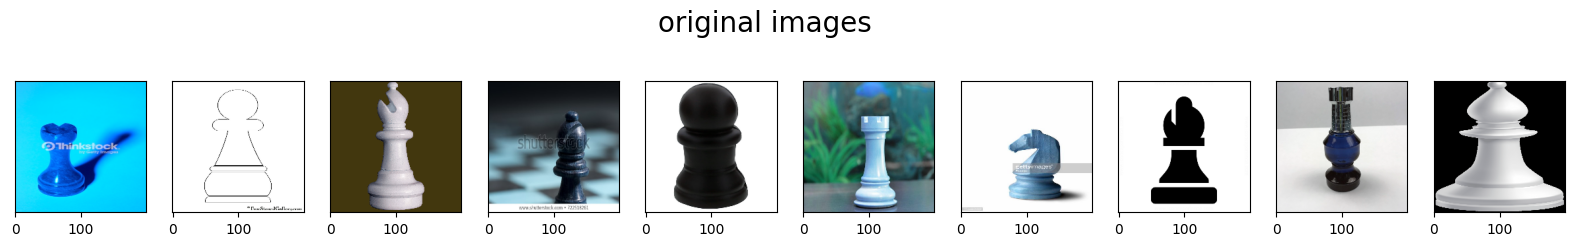

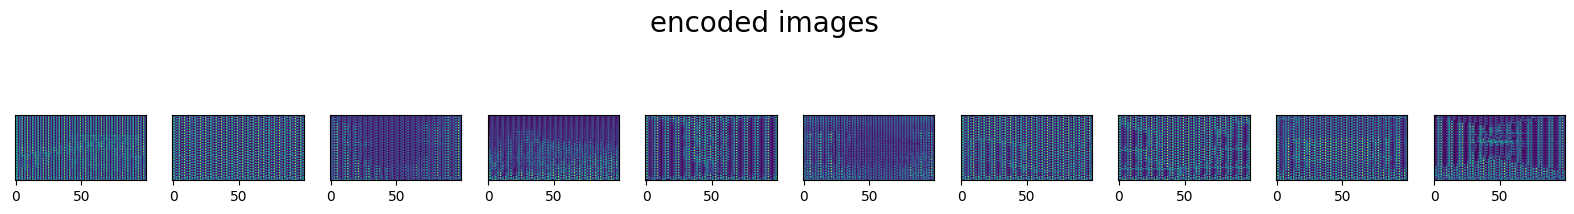

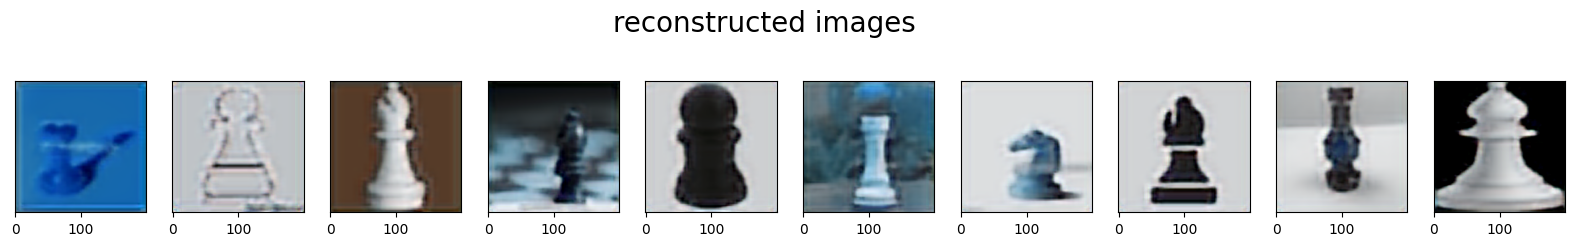

In [14]:
showimg(datatest,title='original images')
showencimg(encchs,title='encoded images',h=50,w=100)
showimg(reconchs,title='reconstructed images')

using matplotlib to show the latent space visualisation after using t-sne to lower the dimensionality of latent space

17/17 [==============================] - 1s 76ms/step


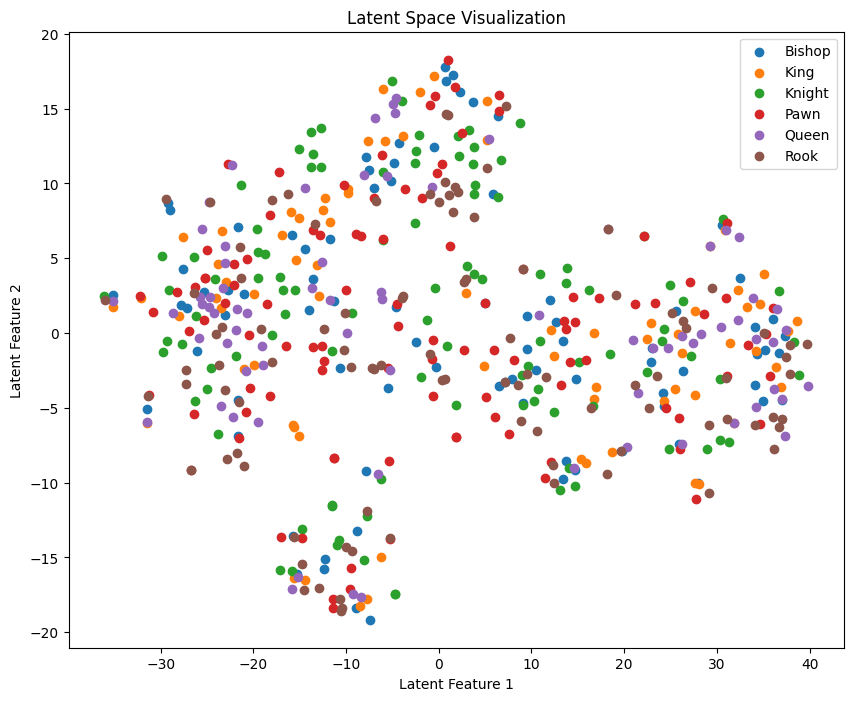

In [16]:
encchs2=encodedchess.predict(np.array(randdata.img.tolist()))
encchs2=encchs2.reshape(len(randdata),25*25*8)
yall=np.array(randdata.lable.tolist())

tsne = TSNE(n_components=2, random_state=23)
encimgs2D = tsne.fit_transform(encchs2)


plt.figure(figsize=(10, 8))


keys=['Bishop','King','Knight','Pawn','Queen','Rook']
for i in range(1,7):  
    indices = np.where(yall == i)[0]
    plt.scatter(encimgs2D[indices, 0], encimgs2D[indices, 1], label=keys[i-1])

plt.title('Latent Space Visualization')
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.legend()
plt.show()